<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - TalentoTech
## Modelo para la prediccion de proyectos de energia renobvable en los municipios de Colombia

_El proyecto fue realizado en el marco del curso de Machine Learning TalentoTech_

## Descripcion 🚀

_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._


### Tecnologias utilizdas 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_



* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikit_learn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />


## Autores 😊


* **Monica Garcia**
* **Juan Pablo Cardenas....**
* **Juan Pablo Quevedo....**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**





## Objetivo
A través del análisis de datos energéticos y meteorológicos, de los municipios, este modelo evalua y predice la viabilidad de un proyecto de energía renovable. Con la información que brinda este algoritmo de _machine learning_ los inversores y los gobiernos locales tienen la oportunidad de evaluar y reducir los costos de un proyecto de energía solar o eólica basandose en un porcentaje de viabilidad predicho por el modelo.


# 1. Importar librerías necesarias

In [1]:
# Librerías para el manejo visuliazacion y analisis de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler






In [2]:
!pip install sodapy

In [3]:
from sodapy import Socrata

In [4]:
client = Socrata("www.datos.gov.co", None)

# 2. Cargar los Datos

* Dataframe 1- Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [5]:
results1 = client.get("3ebi-d83g", limit=5000)

In [6]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [7]:
#Analisis dataframe
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [8]:
df1 = pd.DataFrame(
    {'municipio': datos1['mpio'],
    'potencia_m': datos1['potencia_maxima'],
    'energia_activa': datos1['energia_activa'],
    'energia_reactiva': datos1['energia_reactiva']
    }
)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         4273 non-null   object
 1   potencia_m        4273 non-null   object
 2   energia_activa    4273 non-null   object
 3   energia_reactiva  4273 non-null   object
dtypes: object(4)
memory usage: 133.7+ KB


In [10]:
df1.isnull().sum()

,0
municipio,0
potencia_m,0
energia_activa,0
energia_reactiva,0


In [11]:
#pasa  los datos a numericos
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
df1

,municipio,potencia_m,energia_activa,energia_reactiva
0,PUERTO NARIÑO,286.40,132215,41907.0
1,TARAPACA (ANM),102.60,28132,12662.0
2,VIGÍA DEL FUERTE,27.46,2686,1110.0
3,PROVIDENCIA,2190.28,1331271,284638.0
4,CARTAGENA DE INDIAS,247.59,64368,30561.0
...,...,...,...,...
4268,BUENAVENTURA,31.23,7610,3285.0
4269,CARURÚ,87.82,31775,7881.0
4270,MITÚ,3236.71,1590470,387197.0
4271,TARAIRA,136.84,39226,10719.0


In [12]:
energy = df1.groupby('municipio').agg({'potencia_m': 'mean', 'energia_activa': 'mean', 'energia_reactiva': 'mean'}).reset_index()
energy

,municipio,potencia_m,energia_activa,energia_reactiva
0,ACANDI,830.817500,406312.750000,139347.887500
1,ACANDÍ,816.094078,357045.184466,127895.689320
2,ALTO BAUDO,107.021250,41909.750000,14539.250000
3,ALTO BAUDO (PIE DE PATO),108.590000,46705.000000,16143.490000
4,ALTO BAUDÓ,114.050000,47341.000000,15989.000000
...,...,...,...,...
90,UNGUÍA,356.366078,144421.575163,49519.810458
91,URIBIA,235.369333,41456.044444,11364.911111
92,URIBÍA,188.310000,45381.250000,9129.250000
93,VIGIA DEL FUERTE,35.810000,3567.000000,393.350000


In [13]:
energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         95 non-null     object 
 1   potencia_m        95 non-null     float64
 2   energia_activa    95 non-null     float64
 3   energia_reactiva  95 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [14]:
energy['municipio'].value_counts().sum()

95

Media: 1055.4624708172898
Mediana: 113.20821428571428


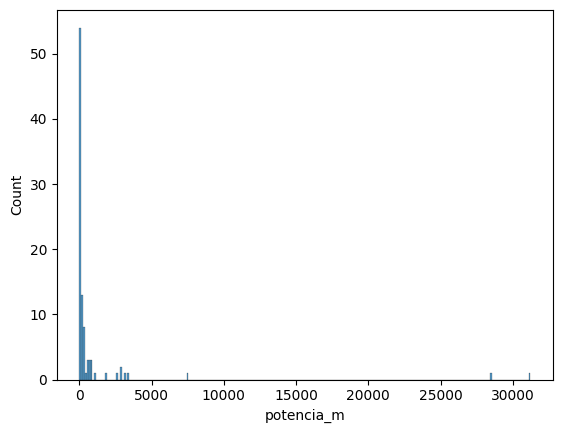

In [15]:
sns.histplot(energy['potencia_m'])
print('Media:', energy['potencia_m'].mean())
print('Mediana:', energy['potencia_m'].median())

Media: 569697.1925745377
Mediana: 34807.13178294573


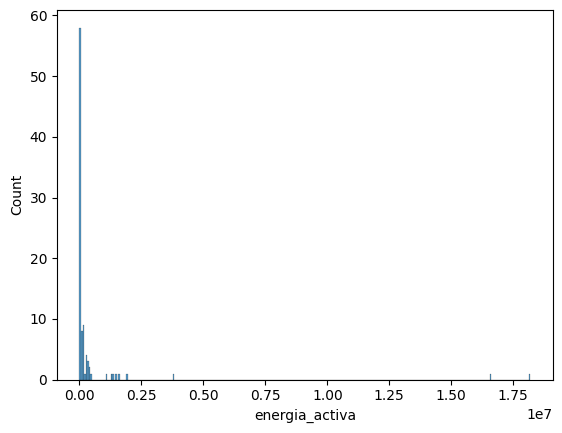

In [16]:
sns.histplot(energy['energia_activa'])
print('Media:', energy['energia_activa'].mean())
print('Mediana:', energy['energia_activa'].median())

Media: 161394.82788102192
Mediana: 10943.466666666667


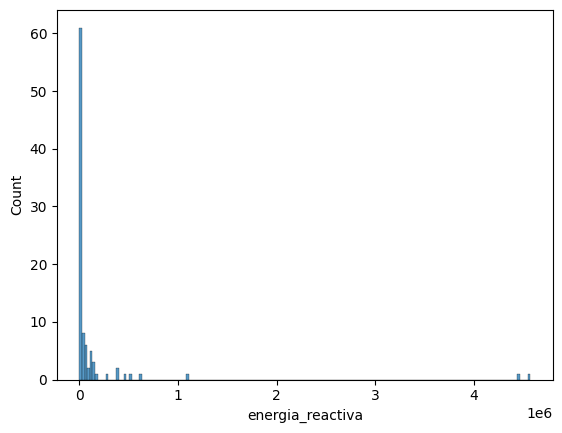

In [17]:
sns.histplot(energy['energia_reactiva'])
print('Media:',energy['energia_reactiva'].mean())
print('Mediana:', energy['energia_reactiva'].median())

<Axes: >

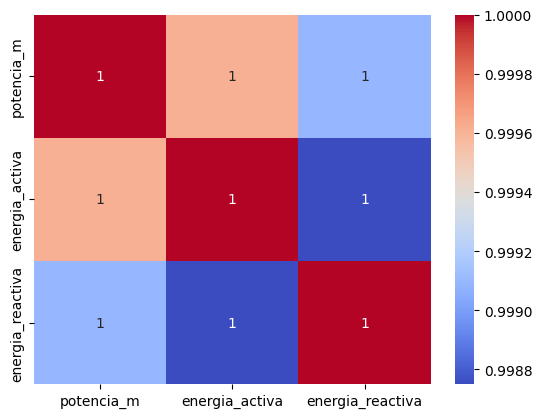

In [18]:
#Analisis de correlacion multivaiada entre las variables de interes. Se muestra una correlacion fuerte.
correlacion1 = energy[['potencia_m', 'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

{'whiskers': [<matplotlib.lines.Line2D at 0x784be6e5d060>,
 'caps': [<matplotlib.lines.Line2D at 0x784be6e5d5a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784be6e5cdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x784be6e5dae0>],
 'fliers': [],
 'means': []}

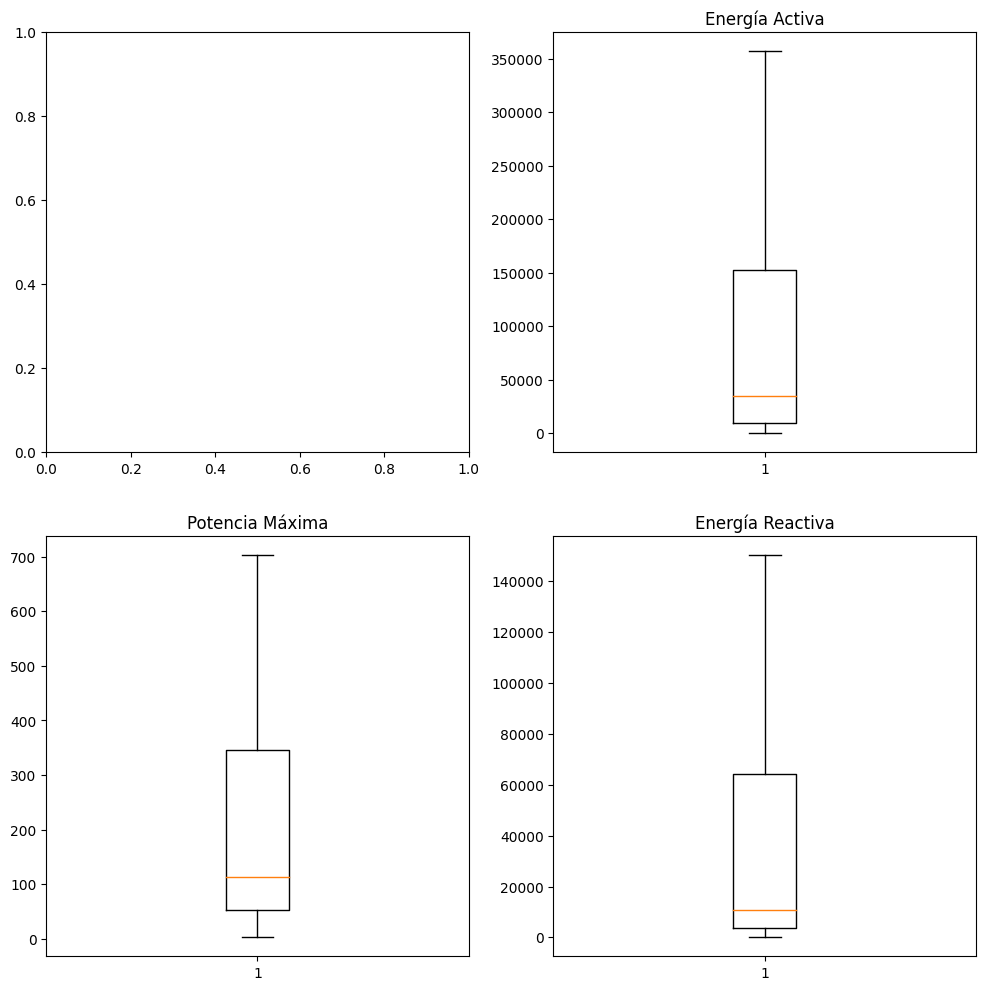

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
#ax[0][0].set_title('Promedio Diaria')
ax[1][0].set_title('Potencia Máxima')
ax[0][1].set_title('Energía Activa')
ax[1][1].set_title('Energía Reactiva')

#boxplots.
#ax[0][0].boxplot(x=df1['prom_diaria'], showfliers=False)
ax[1][0].boxplot(x=energy['potencia_m'], showfliers=False)
ax[0][1].boxplot(x=energy['energia_activa'], showfliers=False)
ax[1][1].boxplot(x=energy['energia_reactiva'], showfliers=False)


* Dataframe 2 - Consumo percapita de energia electrica segun su fuente en Colombia-our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


* Dataframe 3 -  FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

* Dataframe 3 -  Velocidad del viento en los municipios de colombia
[vínculo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8/about_data)

In [22]:
results3 = client.get("sgfv-3yp8", limit=3000)

In [23]:
datos3 = pd.DataFrame.from_records(results3)
datos3

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0029035000,0103,2018-07-01T15:10:00.000,4,SINCERIN - AUT,BOLIVAR,ARJONA,BAJO MAGDALENA,10.14258333,-75.27827778,Velocidad Viento (10 min),m/s
1,0021206930,0103,2017-02-21T18:20:00.000,0.9,PARAMO GUERRERO - AUT,CUNDINAMARCA,ZIPAQUIRÁ,ALTO MAGDALENA,5.086444444,-74.02216667,Velocidad Viento (10 min),m/s
2,0016015130,0103,2015-12-20T07:20:00.000,2.3,ALCALDIA DE HERRAN - AUT,NORTE DE SANTANDER,HERRÁN,CATATUMBO,7.506722222,-72.48536111,Velocidad Viento (10 min),m/s
3,0024015110,0103,2017-06-01T07:30:00.000,0.8,LA BOYERA - AUT,CUNDINAMARCA,UBATÉ,SOGAMOSO,5.303805556,-73.85175,Velocidad Viento (10 min),m/s
4,0022025501,0103,2019-03-03T07:10:00.000,0.0761904,ATACO - AUT,TOLIMA,ATACO,SALDAÑA,3.416666667,-75.63305556,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0054010010,0103,2018-06-17T03:20:00.000,1.2,PR CHOCO: ISTMINA,CHOCÓ,ISTMINA,<nil>,5.159,-76.689,Velocidad Viento (10 min),m/s
2996,0052035040,0103,2017-02-27T18:40:00.000,4.2,VIENTO LIBRE - AUT,NARIÑO,TAMINANGO,PATÍA,1.6185,-77.34361111,Velocidad Viento (10 min),m/s
2997,0021235030,0103,2009-10-08T06:20:00.000,1.1,UNIVERSIDAD DE CUNDINAMARCA - AUT,CUNDINAMARCA,GIRARDOT,ALTO MAGDALENA,4.305333333,-74.80811111,Velocidad Viento (10 min),m/s
2998,0021255170,0103,2012-08-25T06:50:00.000,1,MURILLO - AUT,TOLIMA,MURILLO,ALTO MAGDALENA,4.870555556,-75.17327778,Velocidad Viento (10 min),m/s


In [24]:
df3 = pd.DataFrame(
    {'municipio': datos3['municipio'],
     'velocidad_viento': datos3['valorobservado'],
     "longitud": datos3["longitud"],
     "latitud": datos3["latitud"]
    }
)
df3

,municipio,velocidad_viento,longitud,latitud
0,ARJONA,4,-75.27827778,10.14258333
1,ZIPAQUIRÁ,0.9,-74.02216667,5.086444444
2,HERRÁN,2.3,-72.48536111,7.506722222
3,UBATÉ,0.8,-73.85175,5.303805556
4,ATACO,0.0761904,-75.63305556,3.416666667
...,...,...,...,...
2995,ISTMINA,1.2,-76.689,5.159
2996,TAMINANGO,4.2,-77.34361111,1.6185
2997,GIRARDOT,1.1,-74.80811111,4.305333333
2998,MURILLO,1,-75.17327778,4.870555556


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         3000 non-null   object
 1   velocidad_viento  3000 non-null   object
 2   longitud          3000 non-null   object
 3   latitud           3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [30]:
df3.isnull().sum()

,0
municipio,0
velocidad_viento,0
longitud,0
latitud,0


In [26]:
#pasar la columna velocidad_viento a numérico
df3['velocidad_viento'] = pd.to_numeric(df3['velocidad_viento'], errors='coerce')

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         3000 non-null   object 
 1   velocidad_viento  3000 non-null   float64
 2   longitud          3000 non-null   object 
 3   latitud           3000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 93.9+ KB


In [28]:
viento = df3.groupby('municipio').agg({'velocidad_viento': 'median'}).reset_index()
viento

,municipio,velocidad_viento
0,ABRIAQUÍ,0.500000
1,ACANDÍ,1.550000
2,ACEVEDO,1.588729
3,AGUACHICA,0.800000
4,AGUSTÍN CODAZZI,1.400000
...,...,...
285,YOPAL,1.150000
286,ZETAQUIRÁ,0.400000
287,ZIPAQUIRÁ,2.200000
288,ZONA BANANERA,0.800000


* Dataframe 4 -  Dias con lluvia en los municipios de colombia\
  INFORMACIÓN GENERAL ESTACIONES,,,,,,,,,NORMAL CLIMATOLÓGICA ESTÁNDAR DE No DE DÍAS CON LLUVIA ≥ 1 mm PARA EL PERIODO 1991-2020,,,,,,,,,,,,,  Cumplen la directriz No 1203 del 2017 de la OMM,\
[vínculo](http://archivo.ideam.gov.co/web/tiempo-y-clima/clima)

In [50]:
datos4 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
datos4

,CODIGO,CATEGORIA,ESTACIÓN,MUNICIPIO,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,El Encanto,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,El Encanto,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,La Pedrera,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,La Pedrera,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,La Pedrera,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,Puerto Carreño,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,Puerto Carreño,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,Santa Rosalía,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,Santa Rosalía,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [51]:
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CODIGO             1445 non-null   int64 
 1   CATEGORIA          1445 non-null   object
 2   ESTACIÓN           1445 non-null   object
 3   MUNICIPIO          1445 non-null   object
 4   DEPARTAMENTO       1445 non-null   object
 5   AO                 1445 non-null   int64 
 6   ALTITUD (m)        1445 non-null   int64 
 7   LONGITUD           1445 non-null   object
 8   LATITUD            1445 non-null   object
 9   ENE                1445 non-null   object
 10  FEB                1445 non-null   object
 11  MAR                1445 non-null   object
 12  ABR                1445 non-null   object
 13  MAY                1445 non-null   object
 14  JUN                1445 non-null   object
 15  JUL                1445 non-null   object
 16  AGO                1445 non-null   object


In [52]:
df4 = pd.DataFrame(
    {'municipio': datos4['MUNICIPIO'],
     'dias_lluvia': datos4['ANUAL'],
     "longitud": datos4["LONGITUD"],
     "latitud": datos4["LATITUD"]
    }
)
df4

,municipio,dias_lluvia,longitud,latitud
0,El Encanto,"191,7","-73,20","-1,77"
1,El Encanto,"191,1","-73,21","-1,75"
2,La Pedrera,"216,0","-69,47","-1,23"
3,La Pedrera,"161,8","-69,59","-1,31"
4,La Pedrera,"204,0","-70,18","-1,53"
...,...,...,...,...
1440,Puerto Carreño,"133,2","-67,49","6,18"
1441,Puerto Carreño,"130,7","-67,64","5,68"
1442,Santa Rosalía,"98,7","-70,85","5,14"
1443,Santa Rosalía,"113,4","-70,68","5,35"


In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   municipio    1445 non-null   object
 1   dias_lluvia  1445 non-null   object
 2   longitud     1445 non-null   object
 3   latitud      1445 non-null   object
dtypes: object(4)
memory usage: 45.3+ KB


In [54]:
 # elimina espacios en blanco
df4['dias_lluvia'] = df4['dias_lluvia'].str.strip()
df4['municipio'] = df4['municipio'].str.strip()
df4['longitud'] = df4['longitud'].str.strip()
df4['latitud'] = df4['latitud'].str.strip()

In [55]:
 # Cambia comas por puntos en el campo 'dias_lluvia'
df4['dias_lluvia'] = df4['dias_lluvia'].str.replace(',', '.', regex=False)

In [56]:
# conversion a numerico
df4['dias_lluvia'] = pd.to_numeric(df4['dias_lluvia'], errors='coerce')

In [57]:
#pasa municipio a mayusculas
df4['municipio'] = df4['municipio'].str.upper()
df4

,municipio,dias_lluvia,longitud,latitud
0,EL ENCANTO,191.7,"-73,20","-1,77"
1,EL ENCANTO,191.1,"-73,21","-1,75"
2,LA PEDRERA,216.0,"-69,47","-1,23"
3,LA PEDRERA,161.8,"-69,59","-1,31"
4,LA PEDRERA,204.0,"-70,18","-1,53"
...,...,...,...,...
1440,PUERTO CARREÑO,133.2,"-67,49","6,18"
1441,PUERTO CARREÑO,130.7,"-67,64","5,68"
1442,SANTA ROSALÍA,98.7,"-70,85","5,14"
1443,SANTA ROSALÍA,113.4,"-70,68","5,35"


In [58]:
lluvia = df4.groupby('municipio').agg({'dias_lluvia': 'median'}).reset_index() #,'longitud': 'first', 'latitud': 'first'
lluvia

,municipio,dias_lluvia
0,ABEJORRAL,177.80
1,ABRIAQUÍ,200.60
2,ACACÍAS,195.70
3,ACANDÍ,150.50
4,ACEVEDO,157.65
...,...,...
756,ZONA BANANERA,48.05
757,ÁBREGO,106.70
758,ÍQUIRA,166.50
759,ÚMBITA,170.20


Unificar datos de poblaciones y viento

In [59]:
df_clima = pd.merge(left= viento, right= lluvia, left_on='municipio', right_on= 'municipio', how='left')
df_clima

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.500000,200.60
1,ACANDÍ,1.550000,150.50
2,ACEVEDO,1.588729,157.65
3,AGUACHICA,0.800000,92.60
4,AGUSTÍN CODAZZI,1.400000,77.95
...,...,...,...
285,YOPAL,1.150000,149.60
286,ZETAQUIRÁ,0.400000,179.00
287,ZIPAQUIRÁ,2.200000,147.35
288,ZONA BANANERA,0.800000,48.05


In [96]:
df_climas = pd.DataFrame(
    {'municipio': df_clima['municipio'],
    'velocidad_viento': df_clima['velocidad_viento'],
    'dias_lluvia': df_clima['dias_lluvia']
}
)

df_climas

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.500000,200.60
1,ACANDÍ,1.550000,150.50
2,ACEVEDO,1.588729,157.65
3,AGUACHICA,0.800000,92.60
4,AGUSTÍN CODAZZI,1.400000,77.95
...,...,...,...
285,YOPAL,1.150000,149.60
286,ZETAQUIRÁ,0.400000,179.00
287,ZIPAQUIRÁ,2.200000,147.35
288,ZONA BANANERA,0.800000,48.05


In [97]:
df_climas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         290 non-null    object 
 1   velocidad_viento  290 non-null    float64
 2   dias_lluvia       290 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.9+ KB


<Axes: xlabel='dias_lluvia', ylabel='Count'>

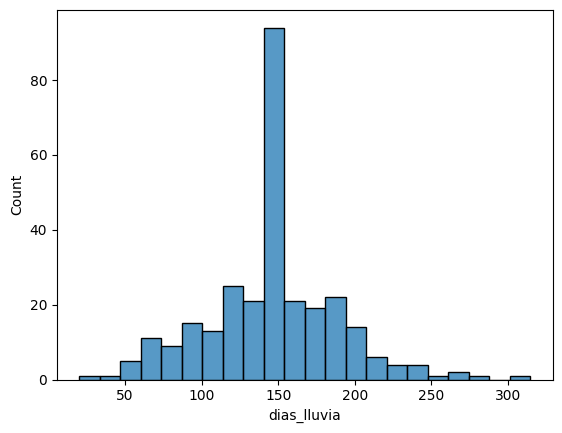

In [99]:
sns.histplot(df_climas['dias_lluvia'])

<Axes: xlabel='velocidad_viento', ylabel='Count'>

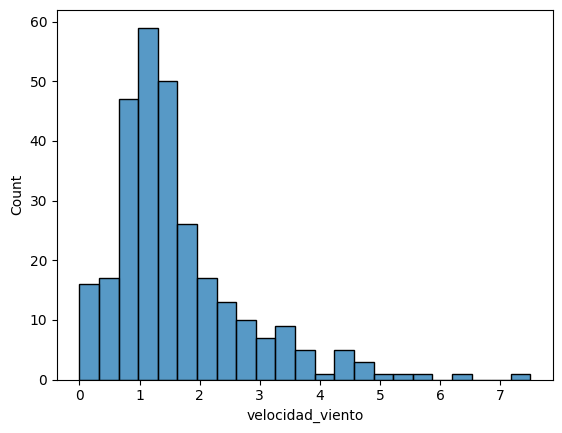

In [100]:
sns.histplot(df_climas['velocidad_viento'])

In [111]:
df_climas['dias_lluvia'] = df_climas['dias_lluvia'].fillna(df_climas['dias_lluvia'].mean())
df_climas

,municipio,velocidad_viento,dias_lluvia
0,ABRIAQUÍ,0.500000,200.60
1,ACANDÍ,1.550000,150.50
2,ACEVEDO,1.588729,157.65
3,AGUACHICA,0.800000,92.60
4,AGUSTÍN CODAZZI,1.400000,77.95
...,...,...,...
285,YOPAL,1.150000,149.60
286,ZETAQUIRÁ,0.400000,179.00
287,ZIPAQUIRÁ,2.200000,147.35
288,ZONA BANANERA,0.800000,48.05


In [112]:
df_climas.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0


In [113]:
df_climas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         290 non-null    object 
 1   velocidad_viento  290 non-null    float64
 2   dias_lluvia       290 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.9+ KB


<Axes: xlabel='municipio', ylabel='Count'>

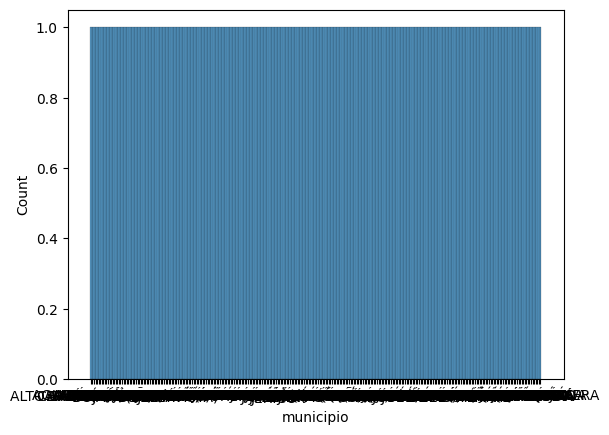

In [69]:
sns.histplot(df_clima['municipio'])

<Axes: >

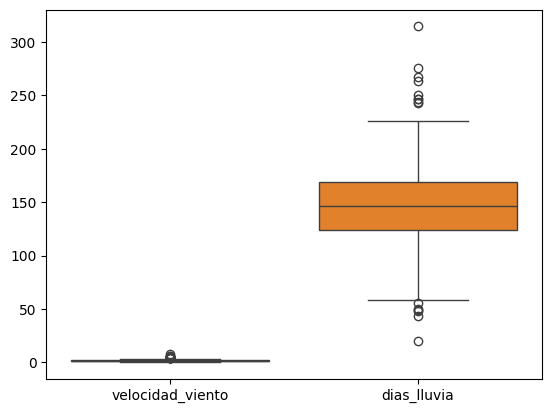

In [114]:
clima = df_climas[['velocidad_viento', 'dias_lluvia']]
sns.boxplot(clima)

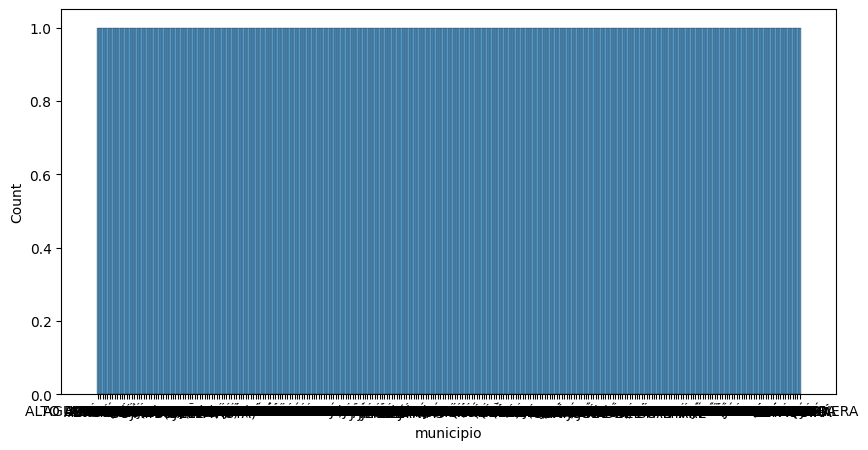

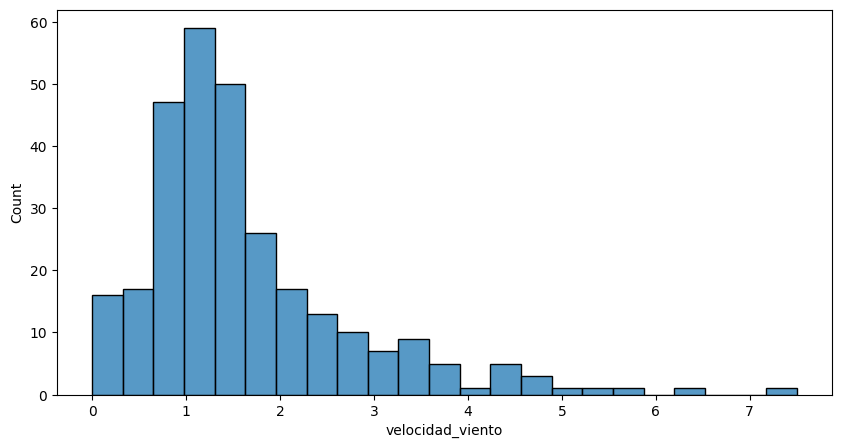

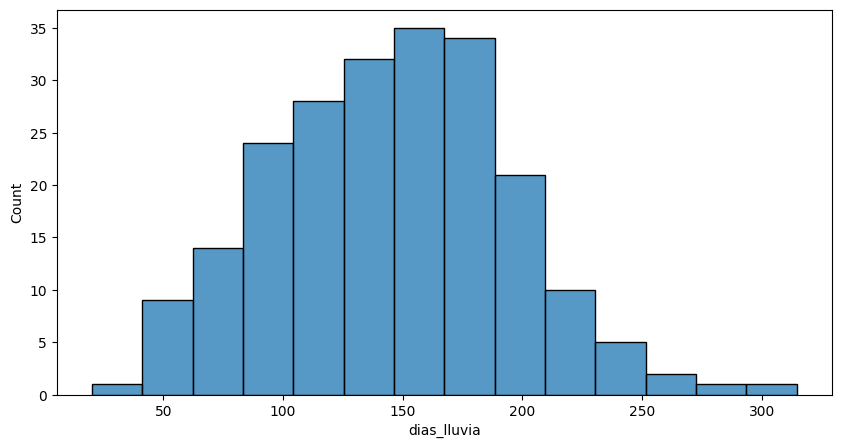

In [72]:
for col in df_climas.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_climas[col])


In [115]:
df_unificado2 = pd.merge(left = df_climas, right = energy, left_on='municipio', right_on= 'municipio', how='left')
df_unificado2

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva
0,ABRIAQUÍ,0.500000,200.60,NaN,NaN,NaN
1,ACANDÍ,1.550000,150.50,816.094078,357045.184466,127895.68932
2,ACEVEDO,1.588729,157.65,NaN,NaN,NaN
3,AGUACHICA,0.800000,92.60,NaN,NaN,NaN
4,AGUSTÍN CODAZZI,1.400000,77.95,NaN,NaN,NaN
...,...,...,...,...,...,...
285,YOPAL,1.150000,149.60,NaN,NaN,NaN
286,ZETAQUIRÁ,0.400000,179.00,NaN,NaN,NaN
287,ZIPAQUIRÁ,2.200000,147.35,NaN,NaN,NaN
288,ZONA BANANERA,0.800000,48.05,NaN,NaN,NaN


In [147]:
df_unificado2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         290 non-null    object 
 1   velocidad_viento  290 non-null    float64
 2   dias_lluvia       290 non-null    float64
 3   potencia_m        23 non-null     float64
 4   energia_activa    23 non-null     float64
 5   energia_reactiva  23 non-null     float64
dtypes: float64(5), object(1)
memory usage: 13.7+ KB


In [166]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_cl = pd.DataFrame(
    {'potencia_m': df_unificado2['potencia_m'],
    'energia_activa': df_unificado2['energia_activa'],
    'energia_reactiva': df_unificado2['energia_reactiva']
}
)




In [167]:
df_cl

,potencia_m,energia_activa,energia_reactiva
0,NaN,NaN,NaN
1,816.094078,357045.184466,127895.68932
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
285,NaN,NaN,NaN
286,NaN,NaN,NaN
287,NaN,NaN,NaN
288,NaN,NaN,NaN


In [168]:
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df_cl), columns=df_cl.columns)

,potencia_m,energia_activa,energia_reactiva
0,1829.746854,1.006550e+06,282325.41020
1,816.094078,3.570452e+05,127895.68932
2,1829.746854,1.006550e+06,282325.41020
3,1829.746854,1.006550e+06,282325.41020
4,1829.746854,1.006550e+06,282325.41020
...,...,...,...
285,1829.746854,1.006550e+06,282325.41020
286,1829.746854,1.006550e+06,282325.41020
287,1829.746854,1.006550e+06,282325.41020
288,1829.746854,1.006550e+06,282325.41020


In [158]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   potencia_m        23 non-null     float64
 1   energia_activa    23 non-null     float64
 2   energia_reactiva  23 non-null     float64
dtypes: float64(3)
memory usage: 6.9 KB


In [174]:
df_viabilidad = pd.concat([df_climas, df_imputed], axis=1)


In [175]:
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva
0,ABRIAQUÍ,0.500000,200.60,1829.746854,1.006550e+06,282325.41020
1,ACANDÍ,1.550000,150.50,816.094078,3.570452e+05,127895.68932
2,ACEVEDO,1.588729,157.65,1829.746854,1.006550e+06,282325.41020
3,AGUACHICA,0.800000,92.60,1829.746854,1.006550e+06,282325.41020
4,AGUSTÍN CODAZZI,1.400000,77.95,1829.746854,1.006550e+06,282325.41020
...,...,...,...,...,...,...
285,YOPAL,1.150000,149.60,1829.746854,1.006550e+06,282325.41020
286,ZETAQUIRÁ,0.400000,179.00,1829.746854,1.006550e+06,282325.41020
287,ZIPAQUIRÁ,2.200000,147.35,1829.746854,1.006550e+06,282325.41020
288,ZONA BANANERA,0.800000,48.05,1829.746854,1.006550e+06,282325.41020


In [177]:
df_viabilidad.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,0
energia_activa,0
energia_reactiva,0


In [138]:
df_unificado2['energia_activa'].value_counts().sum()

23

In [139]:
df_unificado2['energia_activa'].value_counts()

,count
energia_activa,
3.570452e+05,1
2.580077e+03,1
1.444216e+05,1
1.503025e+04,1
1.208110e+04,1
3.282882e+03,1
7.981769e+03,1
1.658901e+07,1
2.782143e+02,1


In [136]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,267
energia_activa,267
energia_reactiva,267


In [179]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
potencia_m,267
energia_activa,267
energia_reactiva,267


In [181]:
df_viabilidad.loc[:, 'viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)).astype(int)
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva,viabilidad
0,ABRIAQUÍ,0.500000,200.60,1829.746854,1.006550e+06,282325.41020,0
1,ACANDÍ,1.550000,150.50,816.094078,3.570452e+05,127895.68932,0
2,ACEVEDO,1.588729,157.65,1829.746854,1.006550e+06,282325.41020,0
3,AGUACHICA,0.800000,92.60,1829.746854,1.006550e+06,282325.41020,1
4,AGUSTÍN CODAZZI,1.400000,77.95,1829.746854,1.006550e+06,282325.41020,1
...,...,...,...,...,...,...,...
285,YOPAL,1.150000,149.60,1829.746854,1.006550e+06,282325.41020,1
286,ZETAQUIRÁ,0.400000,179.00,1829.746854,1.006550e+06,282325.41020,0
287,ZIPAQUIRÁ,2.200000,147.35,1829.746854,1.006550e+06,282325.41020,1
288,ZONA BANANERA,0.800000,48.05,1829.746854,1.006550e+06,282325.41020,1


In [182]:
df_viabilidad['municipio'].values

array(['ABRIAQUÍ', 'ACANDÍ', 'ACEVEDO', 'AGUACHICA', 'AGUSTÍN CODAZZI',
       'ALBANIA', 'ALCALÁ', 'ALDANA', 'ALGECIRAS',
       'ALTO BAUDÓ (PIE DE PATO)', 'AMBALEMA', 'ANAPOIMA', 'ANDES',
       'ANSERMANUEVO', 'ANZOÁTEGUI', 'APÍA', 'AQUITANIA', 'ARATOCA',
       'ARGELIA', 'ARIGUANÍ (EL DIFICIL)', 'ARJONA', 'ARMENIA', 'ATACO',
       'AYAPEL', 'BAHÍA SOLANO (MUTIS)', 'BALBOA', 'BARAYA', 'BARBACOAS',
       'BARRANCA DE UPÍA', 'BARRANCABERMEJA', 'BARRANQUILLA', 'BELLO',
       'BELÉN DE UMBRÍA', 'BOGOTA, D.C', 'BOJACÁ', 'BOJAYÁ (BELLAVISTA)',
       'BUCARAMANGA', 'BUENAVENTURA', 'BUENAVISTA', 'BUGA', 'CABRERA',
       'CACHIPAY', 'CAICEDONIA', 'CAJAMARCA', 'CALARCÁ', 'CALI',
       'CARCASÍ', 'CARMEN DE CARUPA', 'CARMEN DEL DARIÉN  (CURBARADÓ)',
       'CARTAGENA', 'CARTAGO', 'CAÑASGORDAS', 'CERRITO', 'CHAPARRAL',
       'CHARALÁ', 'CHIGORODÓ', 'CHINAVITA', 'CHINCHINA', 'CHINÁCOTA',
       'CHOCONTÁ', 'CIRCASIA', 'CIUDAD BOLÍVAR', 'CIÉNAGA', 'COCORNÁ',
       'CONCORDIA', 'CONDOTO'

In [183]:
df_viabilidad['viabilidad'].value_counts()

,count
viabilidad,
1,199
0,91


<Axes: >

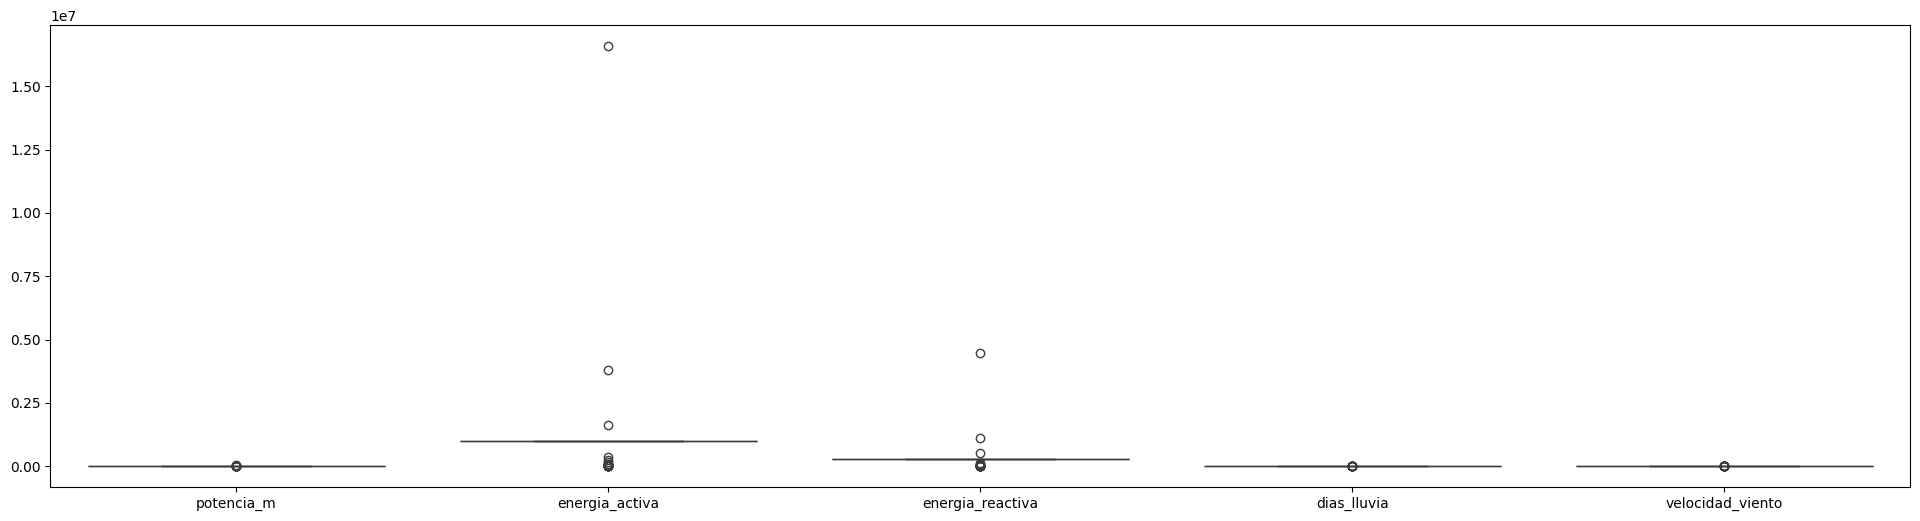

In [184]:
plt.figure(figsize=(24, 6))
variables = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(variables)

<Axes: >

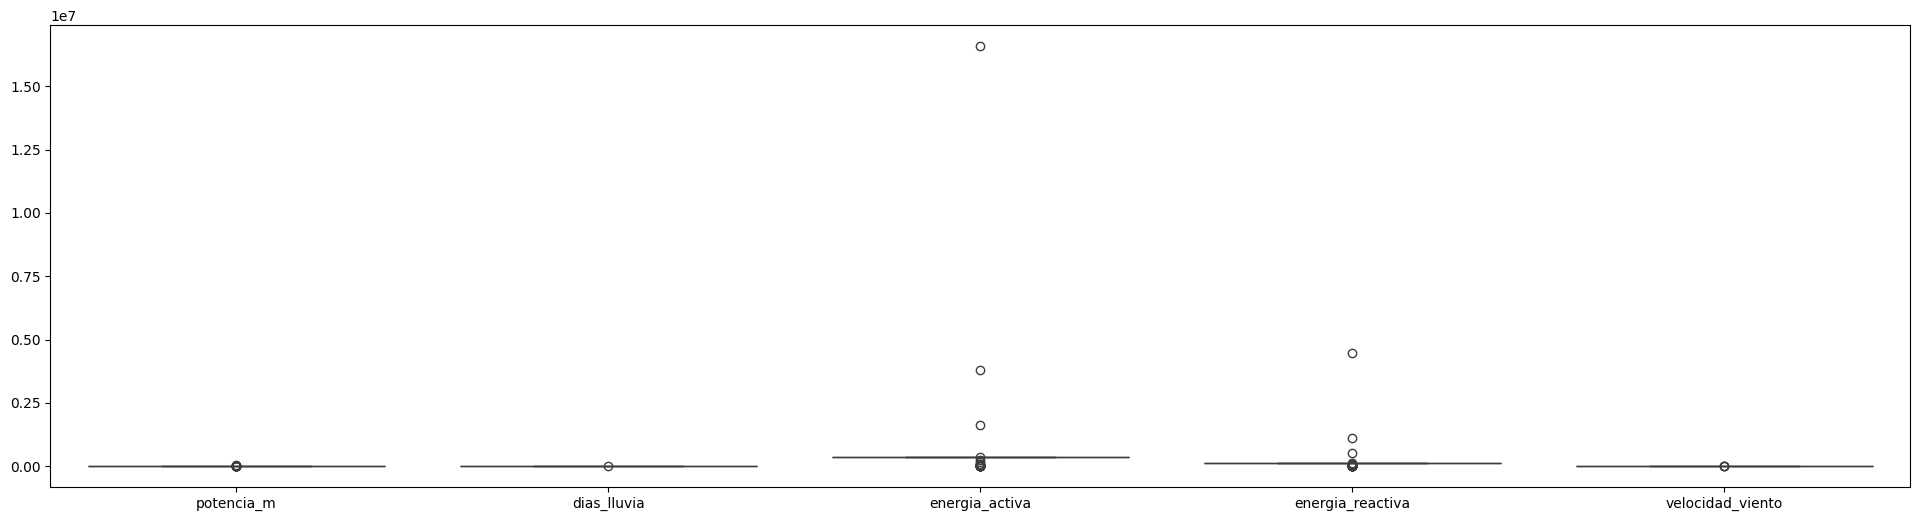

In [119]:
plt.figure(figsize=(24, 6))
vari = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(vari, whis=3)

<Axes: >

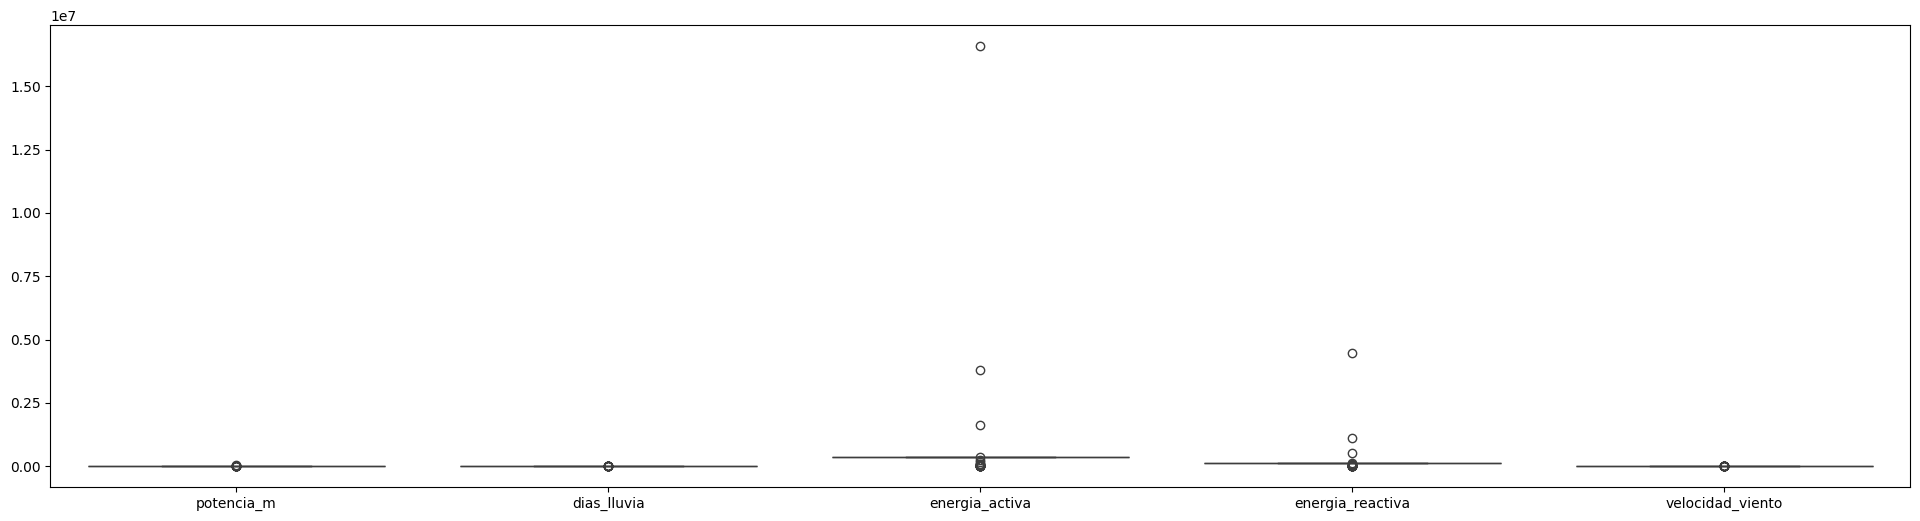

In [120]:
#from scipy.stats.mstats import winsorize

#variables_to_winzorize = ['dias_lluvia', 'energia_activa', 'energia_reactiva', 'potencia_m', 'velocidad_viento']

# Convert the selected columns to a NumPy array before applying winsorize
#for var in variables_to_winzorize:
    #df_viabilidad.loc[:, var] = winsorize(df_viabilidad.loc[:, var].values, limits=[0.07, 0.07])
    # .values extracts the underlying NumPy array from the Pandas Series

plt.figure(figsize=(24, 6))
v = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(v)

<Axes: >

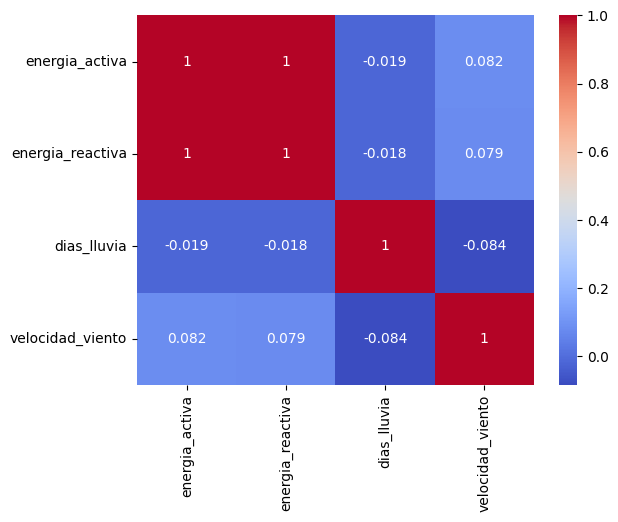

In [185]:
correlacion = df_viabilidad[['energia_activa', 'energia_reactiva','dias_lluvia', 'velocidad_viento']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

In [186]:
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,potencia_m,energia_activa,energia_reactiva,viabilidad
0,ABRIAQUÍ,0.500000,200.60,1829.746854,1.006550e+06,282325.41020,0
1,ACANDÍ,1.550000,150.50,816.094078,3.570452e+05,127895.68932,0
2,ACEVEDO,1.588729,157.65,1829.746854,1.006550e+06,282325.41020,0
3,AGUACHICA,0.800000,92.60,1829.746854,1.006550e+06,282325.41020,1
4,AGUSTÍN CODAZZI,1.400000,77.95,1829.746854,1.006550e+06,282325.41020,1
...,...,...,...,...,...,...,...
285,YOPAL,1.150000,149.60,1829.746854,1.006550e+06,282325.41020,1
286,ZETAQUIRÁ,0.400000,179.00,1829.746854,1.006550e+06,282325.41020,0
287,ZIPAQUIRÁ,2.200000,147.35,1829.746854,1.006550e+06,282325.41020,1
288,ZONA BANANERA,0.800000,48.05,1829.746854,1.006550e+06,282325.41020,1


# Modelo de clasificación NAIVE BAYES

In [284]:
x = df_viabilidad[[ 'energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]
y = df_viabilidad['viabilidad']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)



In [221]:
#from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#escalador = RobustScaler()
x_entrenamientox = escalador.fit_transform(x_entrenamiento)
x_pruebax = escalador.transform(x_prueba)




In [199]:
#y_entrenamiento = y_entrenamiento.to_numpy()
#y_prueba = y_prueba.to_numpy()

In [262]:
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
max_iter

In [302]:
naive_model = MultinomialNB()
naive_model.fit(x_entrenamiento, y_entrenamiento)
predicciones = naive_model.predict(x_prueba)

In [313]:
import pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(naive_model, f)


In [303]:
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.89      0.94      0.92        36

    accuracy                           0.90        58
   macro avg       0.90      0.88      0.89        58
weighted avg       0.90      0.90      0.90        58



In [212]:
#Evaluación del modelo
#print(classification_report(y_prueba, predicciones, zero_division=1))


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.85      0.94      0.89        36

    accuracy                           0.86        58
   macro avg       0.87      0.84      0.85        58
weighted avg       0.86      0.86      0.86        58



In [304]:
print('Accuracy:', accuracy_score(y_prueba, predicciones))

Accuracy: 0.896551724137931


In [305]:
kfold1 = KFold(n_splits=3, shuffle=True, random_state=42)
cv_score1 = cross_val_score(naive_model, x, y, cv=kfold1)


In [306]:
print(cv_score1)
print(cv_score1.mean())

[0.88659794 0.81443299 0.86458333]
0.8552047537227949


In [307]:
matriz1 = confusion_matrix(y_prueba, predicciones)
print(matriz1)

[[18  4]
 [ 2 34]]


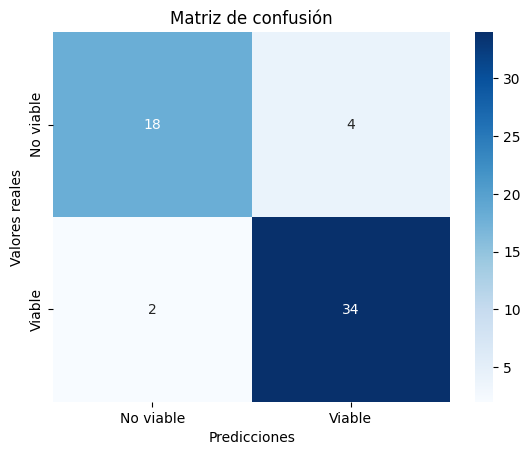

In [308]:

labels = ['No viable', 'Viable']

sns.heatmap(matriz1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [309]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_prueba, predicciones)
auc = roc_auc_score(y_prueba, predicciones)
print(f"AUC: {auc}")

AUC: 0.8813131313131313


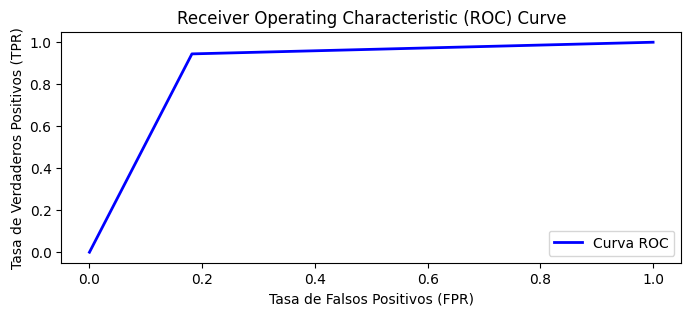

In [310]:
plt.figure(figsize=(8, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC' % auc)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

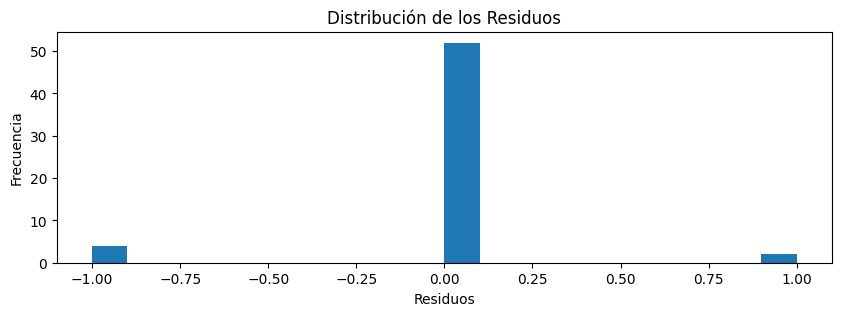

In [311]:
plt.figure(figsize=(10, 3))
residuos = y_prueba - predicciones
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

In [ ]:
def predecir_viabilidad_municipio(municipio, modelo, df_viabilidad):

  municipio = municipio.upper()  # Convertir el nombre del municipio a mayúsculas

  # Buscar el municipio en el DataFrame
  datos_municipio = df_viabilidad[df_viabilidad['municipio'] == municipio]

  if datos_municipio.empty:
    return f"No se encuentran datos suficientes para {municipio}"

  # Obtener las características del municipio
  caracteristicas = datos_municipio[['energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]

  # Realizar la predicción
  prediccion = modelo.predict(caracteristicas)[0]

  # Justificación de la predicción
  justificacion = ""
  if prediccion == 1:
    justificacion = f"El municipio {municipio} es viable para proyectos de energía renovable. "
    if datos_municipio['dias_lluvia'].values[0] < 150:
      justificacion += "Se recomienda un proyecto de energía Solar debido a que llueve menos de 150 al año. "
    elif datos_municipio['velocidad_viento'].values[0] > 3.5:
      justificacion += "Se recomienda un proyecto de energía Eólica debido a que la velocidad promedio del viento es superior al 3.5 m/s."
    elif datos_municipio['velocidad_viento'].values[0] > 3.5 and datos_municipio['dias_lluvia'].values[0] < 150:
      justificacion += "Los proyectos de energía Solar y Eólico son ideales por condiciones climáticas ideales."
  else:
    justificacion = f"El municipio {municipio} NO es viable para proyectos de energía renovable. "
    if datos_municipio['dias_lluvia'].values[0] > 150 or datos_municipio['velocidad_viento'].values[0] < 3.5:
      justificacion += "No se recomienda un proyecto de energía Eólica debido a que no existen buenas condiciones climáticas. "

  return justificacion